<a href="https://colab.research.google.com/github/xanasa14/Finances/blob/main/DownloadingDataYahooFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.14-py3-none-any.whl size=28627 sha256=a32c6fe963d2c582f7cb657bc5dd0abc3213a839357a5adac5ef3270e975d96d
  Stored in directory: /root/.cache/pip/wheels/32/a3/b6/b5b33187f2d42f095fecc236b957b46173fa09e78a106e309f
Successfully built yahoofinancials


In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
from yahoofinancials import YahooFinancials

In [7]:
startDate = "2023-05-01"
#endDate = "2021-12-27"
companies = [             
'MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADBE', 'AAP', 'AMD', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB',
'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL',  'GOOGL', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 
'AMGN', 'APH', 'ADI', 'ANSS', 'AON','APA', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB',
 'AVY','BKR', 'BAC', 'BAX', 'BDX', 'BBY', 'BIO', 'BIIB','BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'CHRW', 'CDNS', 
'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'LUMN','CF','SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 
'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CME', 'CMS', 'KO', 'CTSH','CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CPRT', 
'GLW', 'COST', 'COTY', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN','DXCM','FANG','DLR', 'DFS', 
'T','DISH', 'DG', 'DLTR', 'D', 'DPZ', 'DOV','DTE', 'DUK', 'DD', 'DXC', 'EMN', 'ETN', 'EBAY','ECL','EIX','EW','EA','EMR', 'ETR', 'EOG', 
'EFX', 'FFIV', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FRC', 'FE', 'FISV', 'FLT', 'FLS', 'FMC', 'F', 'FTNT', 'FTV', 'BEN', 
'FCX', 'GPS', 'GRMN','IT', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GL', 'GS', 'GWW', 'H', 'HAL', 'HBI', 'HIG', 'HAS', 'HCA', 'PEAK', 
'HSIC', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM', 'HBAN', 'HII', 'IEX', 'IDXX', 'ITW', 'ILMN', 'INCY', 
'TT', 'INTC', 'IP', 'IPG', 'INT', 'ISRG', 'IVZ', 'IPGP', 'IQV', 'IRM', 'JBHT', 'JKHY', 'J', 'SJM', 'JCI', 'JPM', 'JNPR','K','KEY','LW','LVS',
'LEG', 'LDOS', 'LEN', 'LLY', 'LNC', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'M', 'MRO', 'MPC','MKTX','MAR','MMC','MLM', 'MAS', 'MA', 'MKC', 
'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MGM', 'MCHP', 'M', 'MSFT', 'MAA', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'ORLY',
'OXY','ODFL','OMC','OKE','ORCL', 'PCAR', 'PKG', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PNR', 'PEP', 'PKI','PRGO','PFE','PM','PSX','PNW','PXD', 
'PNC','PPG','PPL','PFG','PG','PGR','PLD','PEG','PSA','PHM','PVH','QRVO','QCOM','PWR', 'DGX', 'RL', 'RJF', 'SLG', 'SNA', 'SO', 'SOFI','LUV','SWK','SBUX',
'STT','STE','SYK','SYF','SNPS','SYY','TMUS','TROW','TTWO', 'TPR', 'TGT', 'TEL', 'FTI','TDY','TFX','TXN','TXT','TDG','TYL',
'TSN', 'USB', 'UDR', 'UL', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UHS', 'UNM', 'VLO', 'VTR', 'VRSN','VRSK','VZ','VRTX','VFC','V','VNO', 
'VMC', 'WRB', 'WAB', 'WBA', 'WMT', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'W', 'WY', 'WHR', 'WMB', 'WYNN', 'XEL', 'TSLA', 'AAPL',
'XRX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZTS','NFLX'

]
data_frames = []
for company in companies:
    df = yf.download(company, start=startDate, progress=False)
    df = df.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])
    df = df.rename(columns={'Adj Close': company})
    tmp = df[str(company)]
    data_frames.append(tmp)

finalData = pd.concat(data_frames, axis=1)

finalData.index.name = 'Date'
#finalData.columns.name = 'Company'

finalData.to_csv('/content/drive/MyDrive/YahooData/YahooFinanceData.csv')

finalData
finalData = finalData.reindex(columns=companies)
finalData


,MMM,AOS,ABT,ABBV,ACN,ATVI,ADBE,AAP,AMD,AES,...,XEL,TSLA,AAPL,XRX,XYL,YUM,ZBRA,ZBH,ZTS,NFLX
Date,,,,,,,,,,,,,,,,,,,,,
2023-05-01,105.849998,70.139999,111.110001,153.710007,279.420013,77.430000,374.149994,125.470001,89.690002,23.160000,...,70.169998,161.830002,169.355743,15.39,104.500000,142.229996,287.450012,138.830002,179.559998,324.119995
2023-05-02,102.980003,69.779999,111.500000,151.619995,276.739990,76.000000,368.660004,124.120003,89.910004,22.600000,...,69.099998,160.309998,168.307190,15.21,104.519997,142.899994,255.440002,143.009995,176.899994,317.549988
2023-05-03,102.830002,69.459999,111.760002,149.250000,275.179993,75.230003,345.250000,123.800003,81.620003,22.450001,...,68.500000,160.610001,167.218704,14.76,104.150002,137.309998,258.500000,139.619995,177.729996,319.299988
2023-05-04,101.839996,69.190002,110.860001,147.360001,266.500000,74.589996,335.829987,120.239998,86.610001,22.480000,...,69.110001,161.199997,165.560989,13.84,106.330002,136.320007,265.000000,136.630005,178.470001,320.779999
2023-05-05,103.349998,70.379997,111.260002,148.029999,265.649994,76.000000,348.399994,123.769997,89.839996,22.670000,...,69.570000,170.059998,173.330261,14.16,108.970001,137.490005,273.799988,137.910004,186.229996,322.760010
2023-05-08,102.339996,70.309998,110.900002,147.449997,264.820007,75.550003,344.059998,125.750000,95.040001,21.709999,...,69.320000,171.789993,173.260345,14.73,107.339996,136.529999,277.859985,137.440002,184.869995,331.209991
2023-05-09,100.800003,69.320000,110.250000,146.830002,263.480011,75.510002,342.649994,125.519997,95.059998,22.270000,...,69.110001,169.149994,171.532745,14.78,106.800003,137.610001,270.160004,136.050003,184.369995,332.140015
2023-05-10,100.900002,69.220001,110.690002,146.419998,268.890015,76.000000,344.019989,125.800003,97.019997,22.639999,...,69.300003,168.539993,173.320267,14.30,106.809998,137.740005,271.769989,137.419998,185.139999,335.420013
2023-05-11,100.779999,68.400002,110.050003,146.589996,272.269989,77.040001,341.579987,124.169998,97.099998,22.030001,...,68.620003,172.080002,173.510010,14.04,105.120003,137.339996,265.279999,136.690002,185.119995,344.760010


In [9]:
#Check if any Columns have empty values(NAN)
df = finalData.copy()


df.sort_values(by=['Date'])
df.columns[df.isna().all()].tolist()

[]

In [10]:
# Drop columns that has all NaN values
df=df.dropna(axis=1,how='all')
df

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADBE,AAP,AMD,AES,...,XEL,TSLA,AAPL,XRX,XYL,YUM,ZBRA,ZBH,ZTS,NFLX
Date,,,,,,,,,,,,,,,,,,,,,
2023-05-01,105.849998,70.139999,111.110001,153.710007,279.420013,77.430000,374.149994,125.470001,89.690002,23.160000,...,70.169998,161.830002,169.355743,15.39,104.500000,142.229996,287.450012,138.830002,179.559998,324.119995
2023-05-02,102.980003,69.779999,111.500000,151.619995,276.739990,76.000000,368.660004,124.120003,89.910004,22.600000,...,69.099998,160.309998,168.307190,15.21,104.519997,142.899994,255.440002,143.009995,176.899994,317.549988
2023-05-03,102.830002,69.459999,111.760002,149.250000,275.179993,75.230003,345.250000,123.800003,81.620003,22.450001,...,68.500000,160.610001,167.218704,14.76,104.150002,137.309998,258.500000,139.619995,177.729996,319.299988
2023-05-04,101.839996,69.190002,110.860001,147.360001,266.500000,74.589996,335.829987,120.239998,86.610001,22.480000,...,69.110001,161.199997,165.560989,13.84,106.330002,136.320007,265.000000,136.630005,178.470001,320.779999
2023-05-05,103.349998,70.379997,111.260002,148.029999,265.649994,76.000000,348.399994,123.769997,89.839996,22.670000,...,69.570000,170.059998,173.330261,14.16,108.970001,137.490005,273.799988,137.910004,186.229996,322.760010
2023-05-08,102.339996,70.309998,110.900002,147.449997,264.820007,75.550003,344.059998,125.750000,95.040001,21.709999,...,69.320000,171.789993,173.260345,14.73,107.339996,136.529999,277.859985,137.440002,184.869995,331.209991
2023-05-09,100.800003,69.320000,110.250000,146.830002,263.480011,75.510002,342.649994,125.519997,95.059998,22.270000,...,69.110001,169.149994,171.532745,14.78,106.800003,137.610001,270.160004,136.050003,184.369995,332.140015
2023-05-10,100.900002,69.220001,110.690002,146.419998,268.890015,76.000000,344.019989,125.800003,97.019997,22.639999,...,69.300003,168.539993,173.320267,14.30,106.809998,137.740005,271.769989,137.419998,185.139999,335.420013
2023-05-11,100.779999,68.400002,110.050003,146.589996,272.269989,77.040001,341.579987,124.169998,97.099998,22.030001,...,68.620003,172.080002,173.510010,14.04,105.120003,137.339996,265.279999,136.690002,185.119995,344.760010


In [11]:
data = df.dropna()
print("DataFrame after removing rows with NaN value in any column:")
print(data)

DataFrame after removing rows with NaN value in any column:
                   MMM        AOS         ABT        ABBV         ACN  \
Date                                                                    
2023-05-03  102.830002  69.459999  111.760002  149.250000  275.179993   
2023-05-04  101.839996  69.190002  110.860001  147.360001  266.500000   
2023-05-05  103.349998  70.379997  111.260002  148.029999  265.649994   
2023-05-08  102.339996  70.309998  110.900002  147.449997  264.820007   
2023-05-09  100.800003  69.320000  110.250000  146.830002  263.480011   
2023-05-10  100.900002  69.220001  110.690002  146.419998  268.890015   
2023-05-11  100.779999  68.400002  110.050003  146.589996  272.269989   
2023-05-12  100.269997  67.239998  110.489998  147.149994  277.190002   

                 ATVI        ADBE         AAP        AMD        AES  ...  \
Date                                                                 ...   
2023-05-03  75.230003  345.250000  123.800003  81.620003 

Axes(0.125,0.2;0.775x0.68)
(10, 1)


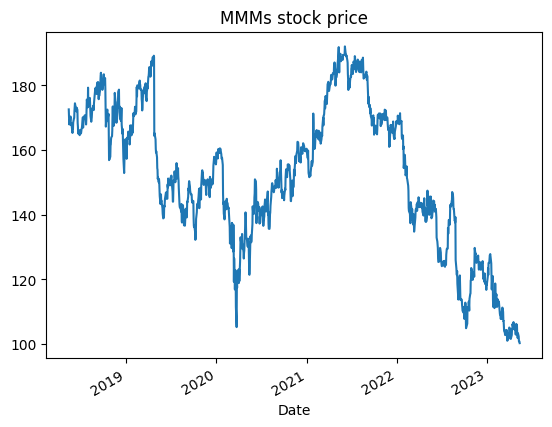

In [12]:
goodCompanies = ['MMM']
for company in goodCompanies[:len(goodCompanies)]:

  ticker = yf.Ticker(company)
  tsla_df = ticker.history(period="5Y")
  print(tsla_df['Close'].plot(title= str(company) + "s stock price"))

print(finalData[goodCompanies].shape)


In [18]:
import plotly.express as px
goodCompanies = ['NFLX','TSLA','DXCM','LLY','TGT','WMT']

df = finalData[goodCompanies]

# Function to plot interactive plots usig Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df.index, y = df[i], name = i)
  fig.show()
# plot interactive chart for stocks data
# plot interactive chart for stocks data
interactive_plot(df, 'Stock Prices')

In [21]:
finalDataEnd = finalData[(finalData.index >= '2020-12-29') & (finalData.index <= '2023-06-10')]


In [23]:
youtubeCompanies = ['TSLA','MAR']
finalDataEnd[youtubeCompanies]

,TSLA,MAR
Date,,
2023-05-01,161.830002,170.139999
2023-05-02,160.309998,178.610001
2023-05-03,160.610001,178.449997
2023-05-04,161.199997,176.479996
2023-05-05,170.059998,176.570007
2023-05-08,171.789993,177.949997
2023-05-09,169.149994,178.990005
2023-05-10,168.539993,175.630005
2023-05-11,172.080002,174.490005
